In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime as dt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Preprocessing

In [ ]:
df = pd.read_csv("/content/winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df2 = df.dropna().reset_index().drop(['index','density','quality'], axis=1)
df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6458,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5
6459,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5
6460,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0
6461,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2


In [ ]:
df3 = df2

In [ ]:
df3.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [ ]:
df3

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6458,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5
6459,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5
6460,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0
6461,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2


In [ ]:
df3.type.value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [ ]:
a = df3["type"].replace("white", 1).replace("red", 0)
df3['nType'] = a
df3

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,nType
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6458,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5,0
6459,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0
6460,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,0
6461,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0


In [ ]:
df3.drop(['type'], axis=1)
df3

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,nType
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6458,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5,0
6459,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0
6460,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,0
6461,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0


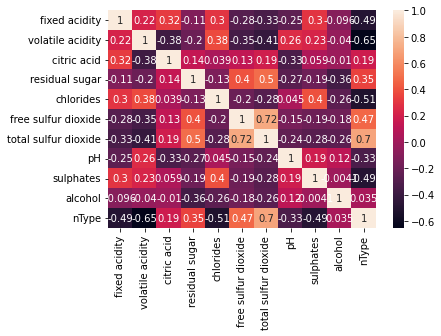

In [ ]:
Var_Corr = df3.corr()

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Testing the models

In [ ]:
df4 = df3.drop(['type','nType'], axis=1)
X = df4
y = df3.nType
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.217054,0.129213,0.115942
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.449612,0.151685,0.217391
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.418605,0.123596,0.304348
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.364341,0.101124,0.275362
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.364341,0.101124,0.275362
...,...,...,...,...,...,...,...,...,...,...
6458,0.247934,0.360000,0.048193,0.019939,0.098007,0.093750,0.073733,0.542636,0.337079,0.217391
6459,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.565891,0.202247,0.362319
6460,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.542636,0.297753,0.434783
6461,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.658915,0.275281,0.318841


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4847, 10) (1616, 10)
(4847,) (1616,)


# Linear Regression

In [ ]:
model = LinearRegression().fit(X_train, y_train)
print("Linear Regression accuracy: ",model.score(X_train, y_train))

Linear Regression accuracy:  0.8045752672461355


In [ ]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.title('Actual vs Predicted')

# Logistic Regression

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
print("Logistic Regression accuracy: ",model.score(X_train, y_train))

Logistic Regression accuracy:  0.9855580771611306


In [ ]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.title('Actual vs Predicted')

# SVM

In [ ]:
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

Y_pred = classifier.predict(X_test)

In [ ]:
X_test["Predictions"] = Y_pred
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,Predictions
514,0.214876,0.013333,0.210843,0.065951,0.064784,0.104167,0.223502,0.550388,0.320225,0.246377,1
1887,0.272727,0.066667,0.156627,0.010736,0.053156,0.065972,0.149770,0.248062,0.292135,0.275362,1
5769,0.371901,0.626667,0.012048,0.042945,0.124585,0.017361,0.011521,0.589147,0.151685,0.434783,0
1091,0.264463,0.046667,0.228916,0.024540,0.063123,0.111111,0.207373,0.317829,0.095506,0.347826,1
3466,0.181818,0.133333,0.162651,0.228528,0.044850,0.104167,0.294931,0.364341,0.123596,0.724638,1
...,...,...,...,...,...,...,...,...,...,...,...
6322,0.652893,0.246667,0.379518,0.024540,0.106312,0.020833,0.039171,0.379845,0.264045,0.420290,0
202,0.190083,0.213333,0.186747,0.004601,0.064784,0.076389,0.377880,0.387597,0.308989,0.217391,1
4014,0.206612,0.106667,0.174699,0.015337,0.071429,0.163194,0.412442,0.379845,0.157303,0.202899,1
3220,0.247934,0.093333,0.246988,0.093558,0.041528,0.131944,0.253456,0.356589,0.134831,0.507246,1


In [ ]:
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("SVM accuracy: ", accuracy)

SVM accuracy:  0.9919554455445545


# KNN

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
result = accuracy_score(y_test,y_pred)
print("KNN accuracy:",result)

KNN accuracy: 0.989480198019802


# Decision Tree

In [ ]:
entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
entropy.fit(X_train, y_train)
y_pred=entropy.predict(X_test)
result = accuracy_score(y_test, y_pred)
print("Decision Tree accuracy: ", result)

Decision Tree accuracy:  0.9727722772277227


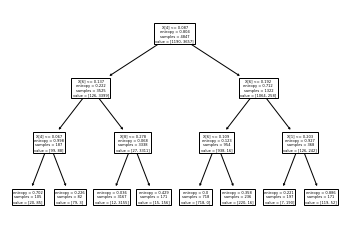

In [ ]:
tree.plot_tree(entropy);

# Random Forest

In [ ]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test) 
result = accuracy_score(y_test, y_pred)
print("Random Forest accuracy: ", result)

Random Forest accuracy:  0.9925742574257426
